In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
inceptionTime_fit_times = np.loadtxt("InceptionTime_foldTimes_ecg200.txt")[1:] # discard burn-in fold
MPSTime_fit_times = np.loadtxt("MPSTime_foldTimes_ecg200.txt")
knn_fit_times = np.loadtxt("KNN_foldTimes_ecg200.txt")[1:] # discard burn-in fold
hc2_fit_times = pd.read_csv("HC2_fittime_UCR.csv") # taken from https://timeseriesclassification.com/results/ReferenceResults/classification/fittime/
hc2_fit_times = hc2_fit_times[hc2_fit_times["Resamples:"] == "ECG200"].iloc[0].to_numpy()[1:]

In [147]:
incpt_mean_fittime = np.mean(inceptionTime_fit_times) # in seconds
incpt_std_fittime = np.std(inceptionTime_fit_times)
mps_mean_fittime = np.mean(MPSTime_fit_times)
mps_std_fittime = np.std(MPSTime_fit_times)
knn_mean_fittime = np.mean(knn_fit_times)
knn_std_fittime = np.std(knn_fit_times)
hc2_mean_fittime = np.mean(hc2_fit_times)
hc2_std_fittime = np.std(hc2_fit_times)

In [160]:
fit_time_df = pd.DataFrame(np.column_stack([knn_fit_times, MPSTime_fit_times, inceptionTime_fit_times, hc2_fit_times]), columns=["1-NN-DTW", "MPSTime", "InceptionTime", "HC2"])

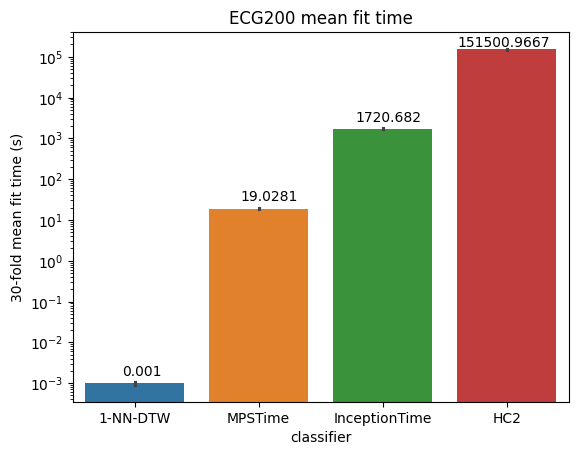

In [172]:
sns.barplot(data=fit_time_df)
plt.yscale("log")
#plt.annotate(text="")
plt.xlabel("classifier")
plt.ylabel("30-fold mean fit time (s)")
plt.title("ECG200 mean fit time")
plt.annotate(text=f"{round(mps_mean_fittime, 4)}", xy=(0.85, mps_mean_fittime + 10))
plt.annotate(text=f"{round(knn_mean_fittime, 4)}", xy=(-0.1, knn_mean_fittime + 0.0005))
plt.annotate(text=f"{round(incpt_mean_fittime, 4)}", xy=(1.78, incpt_mean_fittime + 800))
plt.annotate(text=f"{round(hc2_mean_fittime, 4)}", xy=(2.6, hc2_mean_fittime + 20000))
#lt.ylim(top=10**4)
plt.show()
#plt.savefig("ECG200_fit_time_comparison.pdf")